## [實例] 利用卷積神經網路辨識圖片

### 自己寫爬蟲

In [3]:
import requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
res = requests.get(google_url.format('周子瑜', 0))
soup = BeautifulSoup(res.text, 'lxml' )

In [11]:
for alink in soup.select('a img'):
    if alink.get('src'):
        print(alink.get('src'))
        print('======================')

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSusiRDen63kpJt1tKfPRrrohK1O06dKpMw7vqn4mKC0I7d7SrVyQ
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8vQgndPe1a-ENKD16Q_qItZbj58at5oQu_x8f6MFwbSF8Gy6u
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLj8QNjvWyzBVLrBJ8RYZFCnq-ueBQ6-HN2uv50Nr23ojWIoeFOg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4tJeNm9SPJSrq_6o6Fk9PpkXv0oOa23VZV7OC7-9jcSPkfFaYXg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUKuniCIq_bcdxjYl73miKP3sYBdEbXV21iimjmM_5AiqjgIrGog
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlsIyQqFJA3BfrtGesXk3OEF339r-a36JeZCCaDqG3_6qK_DOV
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlPzcL8oZPRCRxp-GO4XnapE4gy7s2O12bhmL3ihctYSKjXVc9Ag
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpz161DMx7_8FlK7bHsFElEZqzkv_ep7GkzmXHS3_K-7aLHC5z2w
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8WAobvi9cqAQS-tGxzyyw3mXIyhakelIoMWrhkr9XFILj7voF
https://encrypted-tbn0.gstatic.com/images?q

In [13]:
res = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSusiRDen63kpJt1tKfPRrrohK1O06dKpMw7vqn4mKC0I7d7SrVyQ')
with open('1.jpg' , 'wb') as f:
    f.write(res.content)

In [18]:
def getPicture(path, url):
    res = requests.get(url)
    with open('{}/{}.jpg'.format(path, url.split('tbn:')[1]) , 'wb') as f:
        f.write(res.content)

In [20]:
getPicture('zhiyu','https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWH_aMTZOkNXT6NK7WwBP_0OgA5Ugv34HT0t-pNoUannRIj0IM1A')

In [24]:
import requests
import os
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

def getIdolImage(path, term, pagenum):
    if not os.path.exists(path):
        os.mkdir(path)
    for p in range(pagenum):
        res = requests.get(google_url.format(term, p* 100))
        soup = BeautifulSoup(res.text, 'lxml' )
        for alink in soup.select('a img'):
            if alink.get('src'):
                getPicture(path, alink.get('src'))

In [26]:
getIdolImage('zhiyu','周子瑜', 5)

In [27]:
getIdolImage('chilin','林志玲', 5)

In [28]:
getIdolImage('puff','郭雪芙', 5)

### google_images_download

In [29]:
! pip install google_images_download

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\1f\28\ad\f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [30]:
from google_images_download import google_images_download 
response = google_images_download.googleimagesdownload()   
arguments = {"keywords":"北極熊","limit":20,"print_urls":True}   
paths = response.download(arguments) 


Item no.: 1 --> Item name = \u5317\u6975\u718a
Evaluating...
Starting Download...
Image URL: https://www.natgeomedia.com/wp-content/uploads/2018/08/explore-through-the-lens-polar-bear.adapt_.885.1-801x1024.jpg
Completed Image ====> 1.explore-through-the-lens-polar-bear.adapt_.885.1-801x1024.jpg
Image URL: https://images.chinatimes.com/newsphoto/2019-07-29/900/20190729003677.jpg
Completed Image ====> 2.20190729003677.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Polar_Bear_ANWR_1.jpg/300px-Polar_Bear_ANWR_1.jpg
Completed Image ====> 3.300px-Polar_Bear_ANWR_1.jpg
Image URL: http://taiwanbear.org.tw/admin/resource/images/f5cec8c65ae27a.jpeg
Completed Image ====> 4.f5cec8c65ae27a.jpeg
Image URL: https://cw1.tw/CW/images/article/201704/article-58f87f1924ef8.jpg
Completed Image ====> 5.article-58f87f1924ef8.jpg
Image URL: https://cdn2.ettoday.net/images/3846/d3846148.jpg
Completed Image ====> 6.d3846148.jpg
Image URL: http://www.hkedcity.net/cms_files/cms-funpost/

### 使用OpenCV 擷取人臉部分
- https://www.lfd.uci.edu/~gohlke/pythonlibs/
- opencv_python‑3.4.7‑cp37‑cp37m‑win_amd64.whl
- https://download.lfd.uci.edu/pythonlibs/r3aykn4w/opencv_python-3.4.7-cp37-cp37m-win_amd64.whl

In [31]:
! pip install C:/Users/user/Downloads/opencv_python-3.4.7-cp37-cp37m-win_amd64.whl

Processing c:\users\user\downloads\opencv_python-3.4.7-cp37-cp37m-win_amd64.whl


In [32]:
import cv2 as cv

### Haar cascade
https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

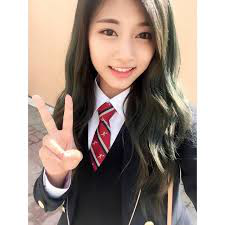

In [34]:
from PIL import Image
im = Image.open('zhiyu/ANd9GcQcLKvlkOVQaeeoIq95TvEoxS307xBVfrXtbRsU4ylcydLoa5RT.jpg')
im

In [35]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('zhiyu/ANd9GcQcLKvlkOVQaeeoIq95TvEoxS307xBVfrXtbRsU4ylcydLoa5RT.jpg')
img.shape

(225, 225, 3)

In [36]:
?face_cascade.detectMultiScale

In [37]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [38]:
faces

array([[81,  6, 84, 84]], dtype=int32)

In [39]:
x,y,w,h = faces[0]

In [40]:
box = (x, y, x+w, y+h)

In [41]:
crpim = im.crop(box).resize((64,64))

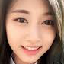

In [42]:
crpim

In [43]:
src  = 'zhiyu/'
dest = 'zhiyu_face/'

if not os.path.exists(dest):
    os.mkdir(dest)
    
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

for filename in os.listdir(src):
    img = cv.imread(src + filename)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if len(faces) == 1:
        im      = Image.open(src + filename)
        x,y,w,h = faces[0]
        box     = (x, y, x+w, y+h)
        crpim   = im.crop(box).resize((64,64))
        crpim.save(dest + filename)

In [44]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [45]:
cropIdolFace('zhiyu/', 'zhiyu_face/')

In [46]:
cropIdolFace('chilin/', 'chilin_face/')

In [47]:
cropIdolFace('puff/', 'puff_face/')

### face_recognition

In [ ]:
! pip install face_recognition

In [ ]:
import face_recognition
image = face_recognition.load_image_file('zhiyu/ANd9GcQcLKvlkOVQaeeoIq95TvEoxS307xBVfrXtbRsU4ylcydLoa5RT.jpg')
face_locations = face_recognition.face_locations(image)
face_locations

### 使用 CNN 建立人臉識別模型

In [19]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [20]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

### 圖像增廣技術

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### 將資料分為訓練與測試資料集

In [9]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [10]:
import os
len(list(os.listdir('chilin_face/')))
dataset = list(os.listdir('chilin_face/'))

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)

In [11]:
if not os.path.exists('train/chilin_face/'):
    os.mkdir('train/chilin_face/')
if not os.path.exists('test/chilin_face/'):
    os.mkdir('test/chilin_face/')
    
for f in train_data:
    os.rename('chilin_face/' + f, 'train/chilin_face/' + f)
for f in test_data:
    os.rename('chilin_face/' + f, 'test/chilin_face/' + f)

In [12]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [13]:
splitDataset('puff_face/')

In [14]:
splitDataset('zhiyu_face/')

In [15]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 118 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 31 images belonging to 3 classes.


### 訓練神經網路

In [22]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=16,
                         steps_per_epoch = 10,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
 2/10 [=====>........................] - ETA: 0s - loss: 0.6112 - acc: 0.6875

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=10, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=16)`
  


10/10 [==============================] - 1s 82ms/step - loss: 0.6291 - acc: 0.7295 - val_loss: 0.8156 - val_acc: 0.7056
Epoch 2/10
10/10 [==============================] - 1s 77ms/step - loss: 0.7191 - acc: 0.7373 - val_loss: 0.7728 - val_acc: 0.6774
Epoch 3/10
10/10 [==============================] - 1s 79ms/step - loss: 0.6759 - acc: 0.7044 - val_loss: 0.7111 - val_acc: 0.7742
Epoch 4/10
10/10 [==============================] - 1s 80ms/step - loss: 0.6659 - acc: 0.7107 - val_loss: 0.7418 - val_acc: 0.7097
Epoch 5/10
10/10 [==============================] - 1s 78ms/step - loss: 0.7940 - acc: 0.6886 - val_loss: 0.6883 - val_acc: 0.7742
Epoch 6/10
10/10 [==============================] - 1s 79ms/step - loss: 0.6427 - acc: 0.7785 - val_loss: 0.7556 - val_acc: 0.7137
Epoch 7/10
10/10 [==============================] - 1s 82ms/step - loss: 0.5606 - acc: 0.7956 - val_loss: 0.5977 - val_acc: 0.8024
Epoch 8/10
10/10 [==============================] - 1s 79ms/step - loss: 0.5673 - acc: 0.7924 

### 使用模型分類圖片

In [128]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('predicted.png')
img.shape

(317, 272, 3)

In [129]:
faces = face_cascade.detectMultiScale(img, 1.3, 3)

In [130]:
faces

array([[ 36,  78, 102, 102],
       [ 49, 163,  74,  74]], dtype=int32)

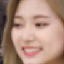

In [131]:
from PIL import Image
im = Image.open('predicted.png')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim

In [132]:
crpim.save('predict_face.jpg')

In [133]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [134]:
#test_image

In [135]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [136]:
classifier.predict_classes(test_image)

array([2], dtype=int64)

In [137]:
training_set.class_indices

{'chilin_face': 0, 'puff_face': 1, 'zhiyu_face': 2}

In [138]:
dic = {}
for k in training_set.class_indices:
    dic[training_set.class_indices[k]] = k

In [139]:
dic.get(classifier.predict_classes(test_image)[0])

'zhiyu_face'